In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import mouse
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [47]:
# load data
rate, data = mouse()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 500, 120000, rate, order=2)

In [48]:
len(data)

2500000

In [50]:
data = data[1250000:1850000]
len(data) / rate

2.4

In [51]:
figsize = (30,3)

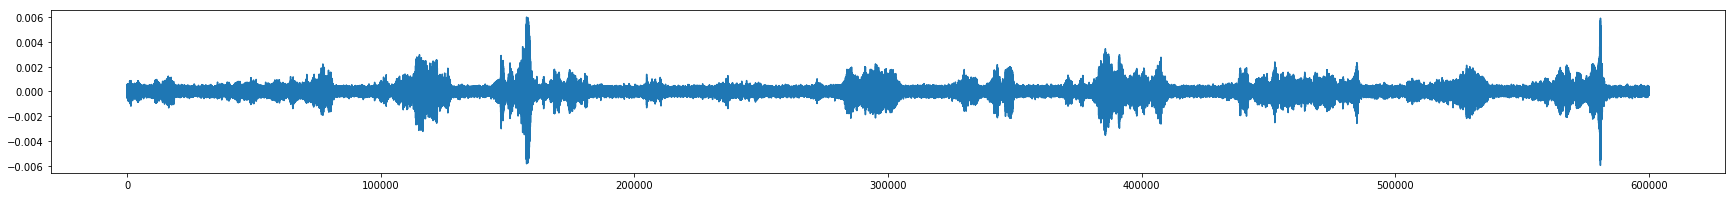

In [52]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

In [61]:
### parameters
n_fft=4096 # FFT window size
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-80
silence_threshold = 0.05
min_silence_for_spec=0.025
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [40000, 100000]
mask_thresh_std = 1.0
neighborhood_thresh=0.5
max_element_len_ms=2000
neighborhood_time_ms=5
neighborhood_freq_hz=2000
temporal_neighbor_merge_distance_ms= 0
overlapping_element_merge_thresh= 0.5
min_element_size_ms_hz = [5, 1000]

In [62]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

(2049, 2401)

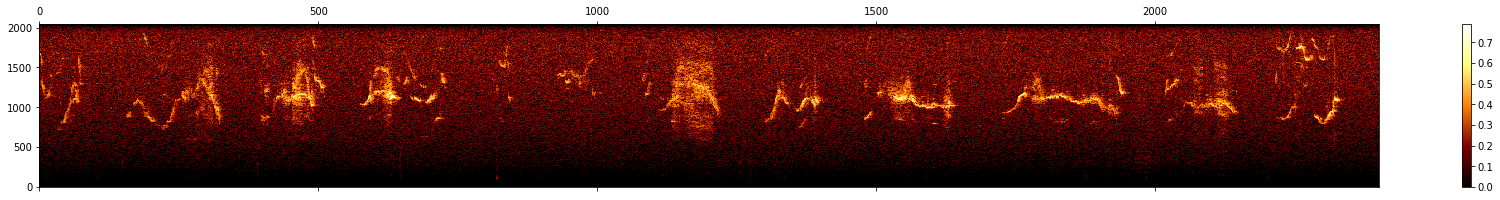

In [63]:
figsize = (30,3)
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### segment vocalization using continuity segmenation 

In [64]:
from vocalseg.continuity_filtering import continuity_segmentation


longest silence 0.0020000000000000018
longest vocalization 0.48399999999999976
Current min_level_db: -80
longest silence 0.0020000000000000018
longest vocalization 0.48399999999999976
Current min_level_db: -75
longest silence 0.0030000000000000027
longest vocalization 0.29100000000000015
Current min_level_db: -70
longest silence 0.025000000000000022
longest vocalization 0.22999999999999998


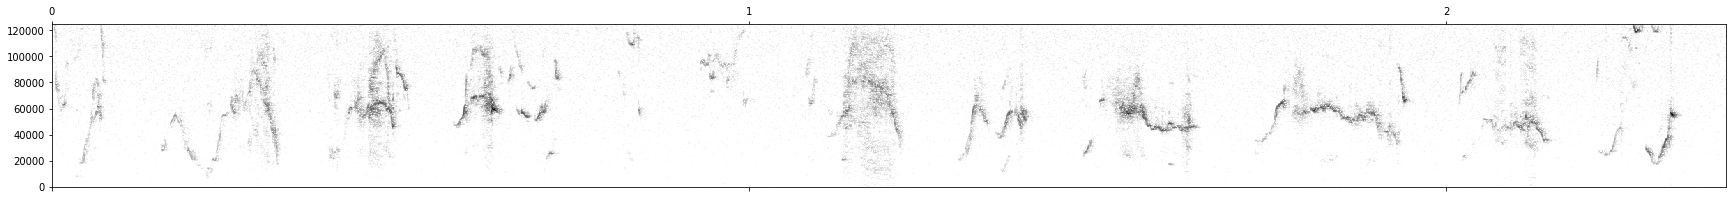

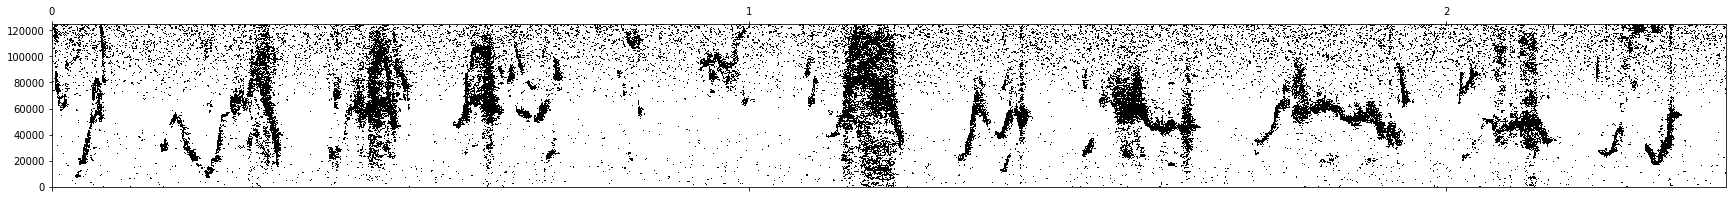

(32, 5)


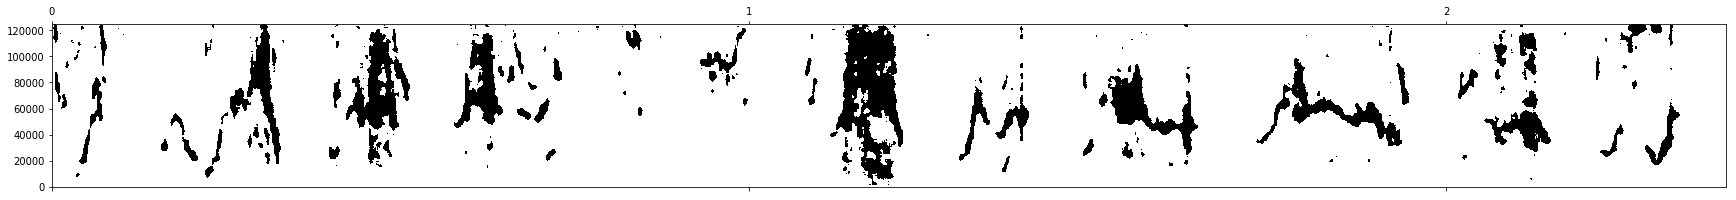

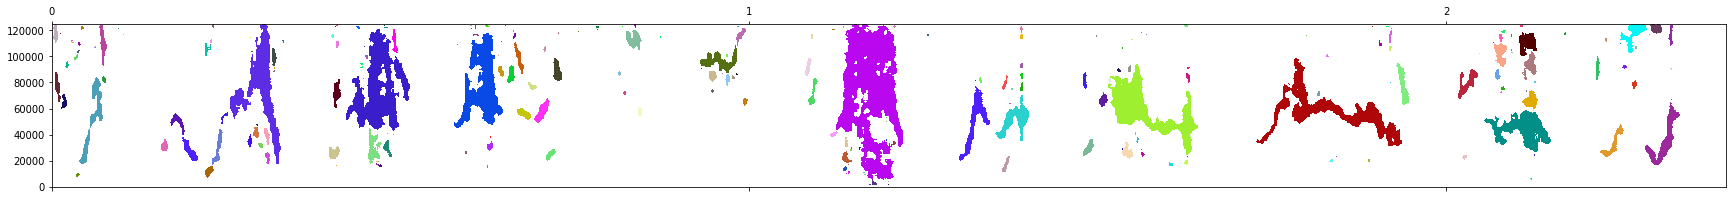

unique elements: 282


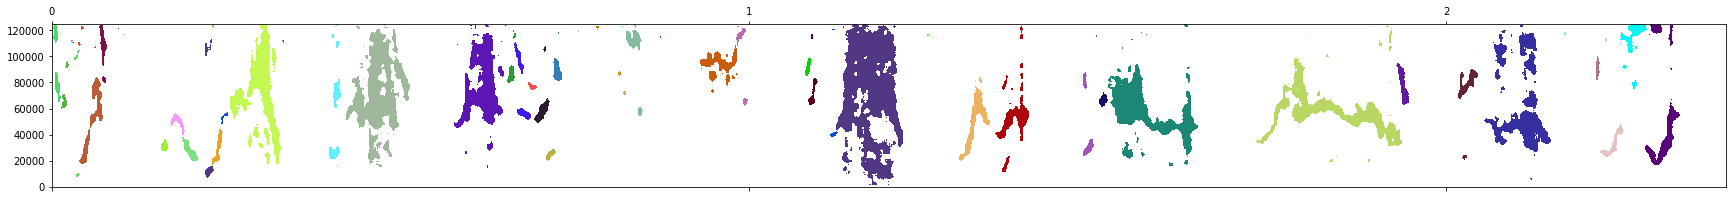

unique elements: 64
82


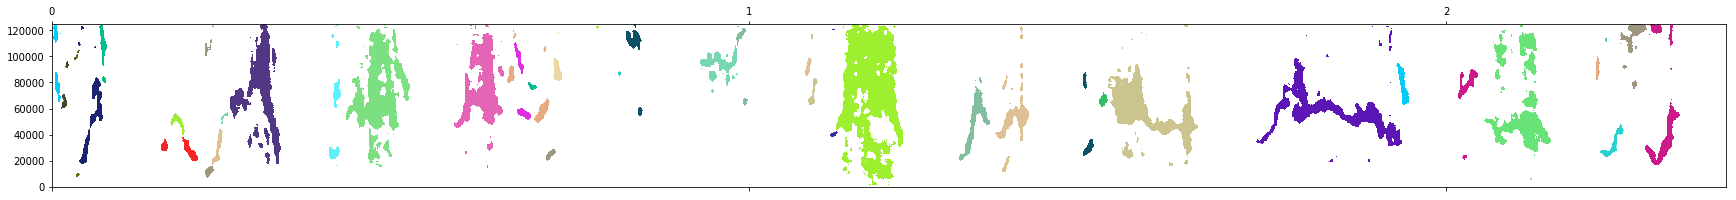

unique elements: 26
-65


In [69]:
results = continuity_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    verbose=True,
    spectral_range = spectral_range,
    mask_thresh_std = mask_thresh_std,
    figsize=figsize,
    neighborhood_thresh=neighborhood_thresh,
    neighborhood_time_ms=neighborhood_time_ms,
    neighborhood_freq_hz=neighborhood_freq_hz,
    temporal_neighbor_merge_distance_ms= 0, #10,
    overlapping_element_merge_thresh= 0.5,
    min_silence_for_spec = min_silence_for_spec,
    min_element_size_ms_hz = [5, 1000]
)
print(results['min_level_db'])

In [70]:
from vocalseg.continuity_filtering import plot_labelled_elements

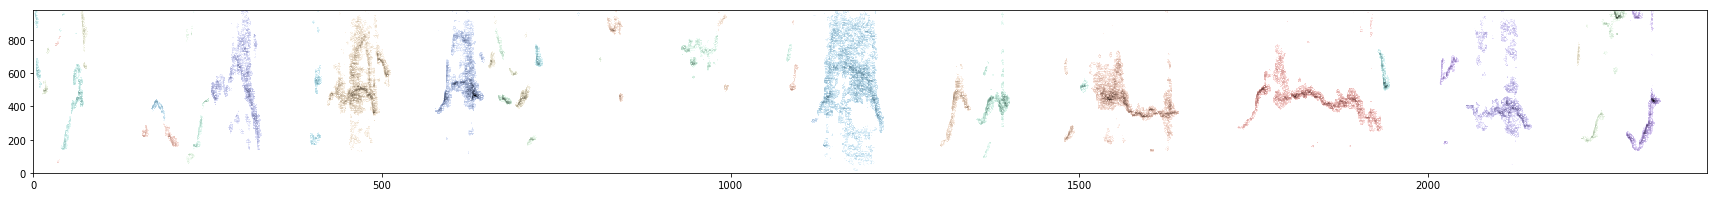

In [71]:
labelled_spec = plot_labelled_elements(results['elements'], results['spec'], figsize=(30,3));